# Rain Prediction
## Author: Eren ERİŞ
Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code

Desription : 

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix,f1_score
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB , BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf 
from tensorflow import keras 

In [2]:
df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.shape

(145460, 23)

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", utc=True)

In [15]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [7]:
# calculating missing values
(df.isna().sum().sort_values(ascending = False)) / len(df)

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
Rainfall         0.022419
RainToday        0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
Temp9am          0.012148
WindSpeed9am     0.012148
MinTemp          0.010209
MaxTemp          0.008669
Location         0.000000
Date             0.000000
dtype: float64

In [8]:
# Categorical columns that have missing values
df_cat = df.select_dtypes(include = ['object'])

(df_cat.isna().sum().sort_values(ascending = False)) / len(df)

WindDir9am      0.072639
WindGustDir     0.070989
WindDir3pm      0.029066
RainTomorrow    0.022460
RainToday       0.022419
Date            0.000000
Location        0.000000
dtype: float64

In [9]:
# Drop the rows with the missing values
for column_name in df_cat.columns:
    df.dropna(subset=[column_name], inplace=True)
    df_cat.dropna(subset=[column_name], inplace=True)

# Check the shape after dropping rows with missing values
df.shape

(123710, 23)

In [12]:
# calculating missing values
(df.isna().sum().sort_values(ascending = False)) / len(df)

Sunshine         0.457708
Evaporation      0.409401
Cloud3pm         0.389888
Cloud9am         0.373729
Pressure9am      0.073721
Pressure3pm      0.073309
Humidity3pm      0.012303
Humidity9am      0.008180
Temp3pm          0.006426
Temp9am          0.002773
MinTemp          0.000728
MaxTemp          0.000364
Date             0.000000
RainToday        0.000000
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Location         0.000000
WindDir3pm       0.000000
WindDir9am       0.000000
WindGustSpeed    0.000000
WindGustDir      0.000000
Rainfall         0.000000
RainTomorrow     0.000000
dtype: float64

In [13]:
df["Location"]

0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
145454     Uluru
145455     Uluru
145456     Uluru
145457     Uluru
145458     Uluru
Name: Location, Length: 123710, dtype: object

In [28]:
###drop missing values
df3 = df.dropna()
df3.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2012.221074,6.425009,15.723910
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,2.450978,3.451383,8.782527
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,2007.000000,1.000000,1.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,2010.000000,3.000000,8.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,2012.000000,6.000000,16.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,2014.000000,9.000000,23.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,2017.000000,12.000000,31.000000


In [20]:
df3.shape

(56420, 26)

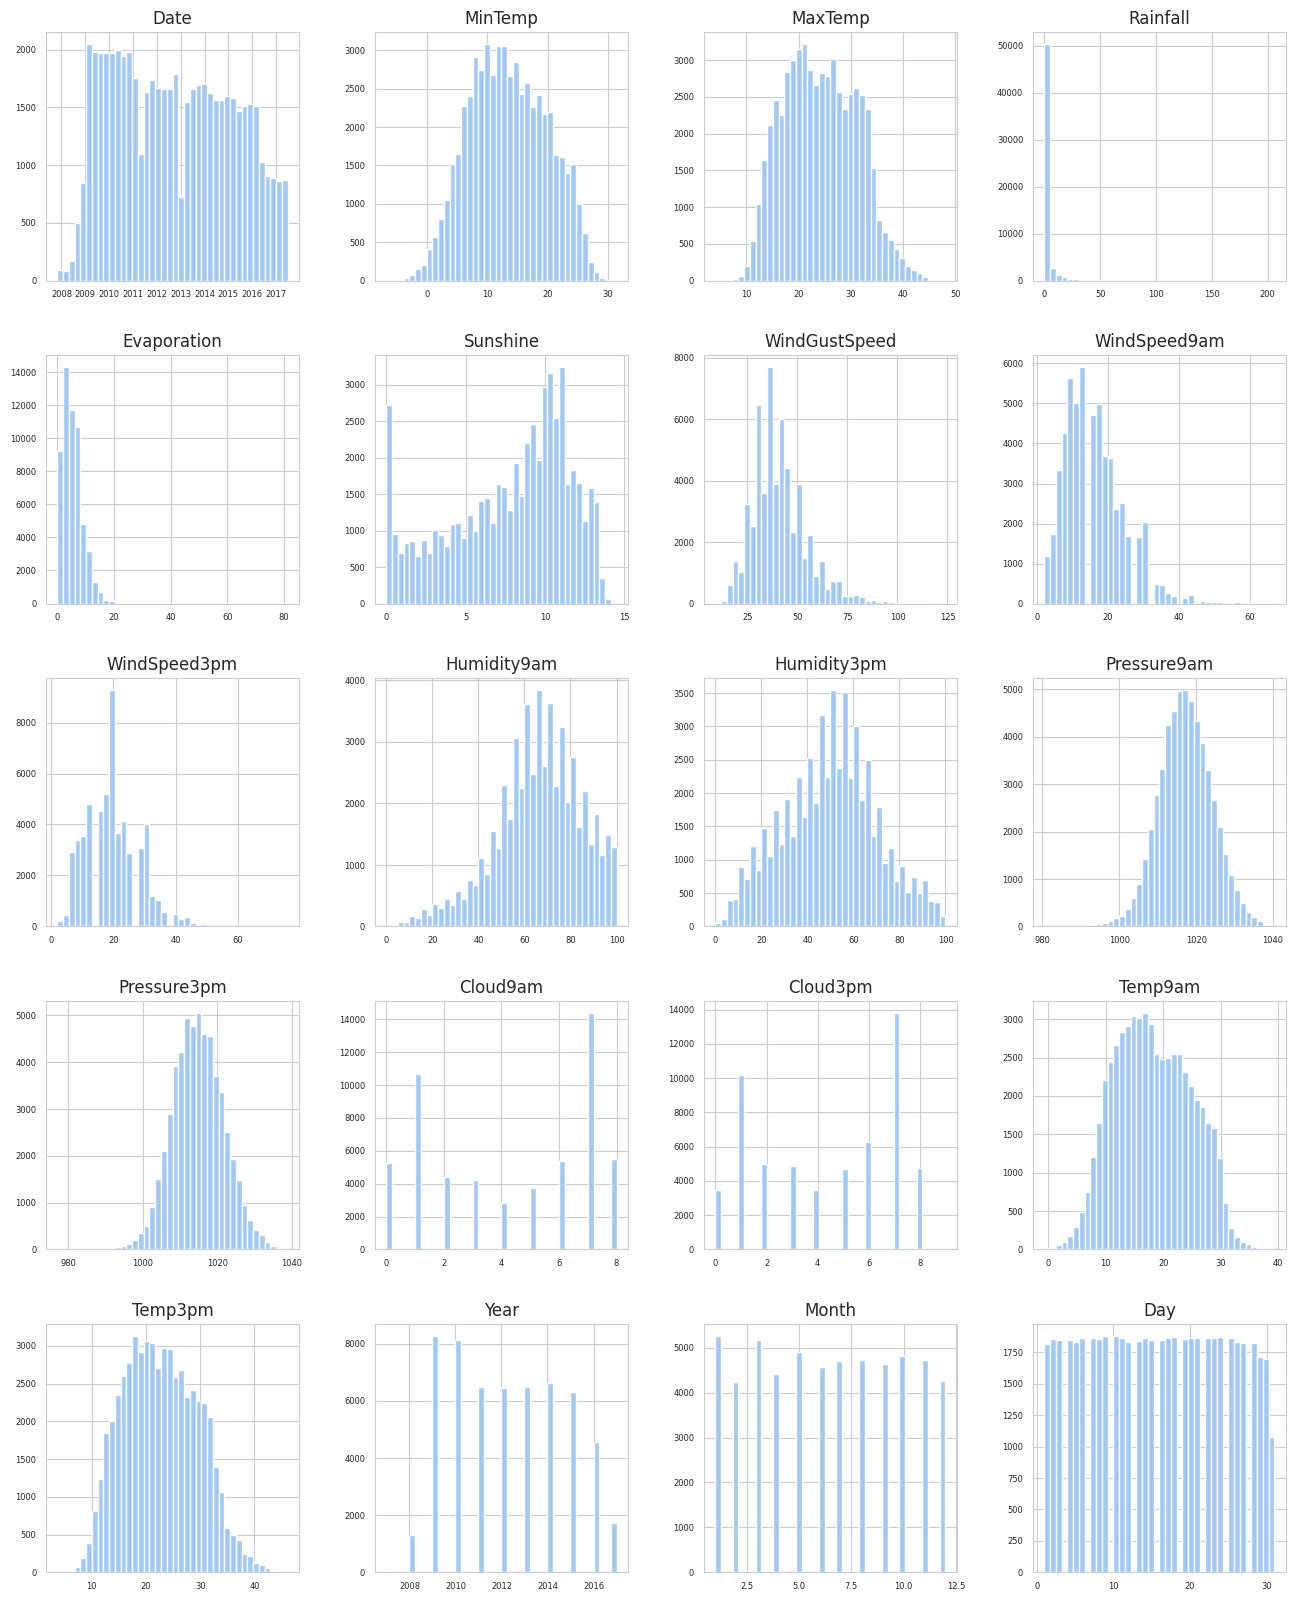

In [22]:
df3.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

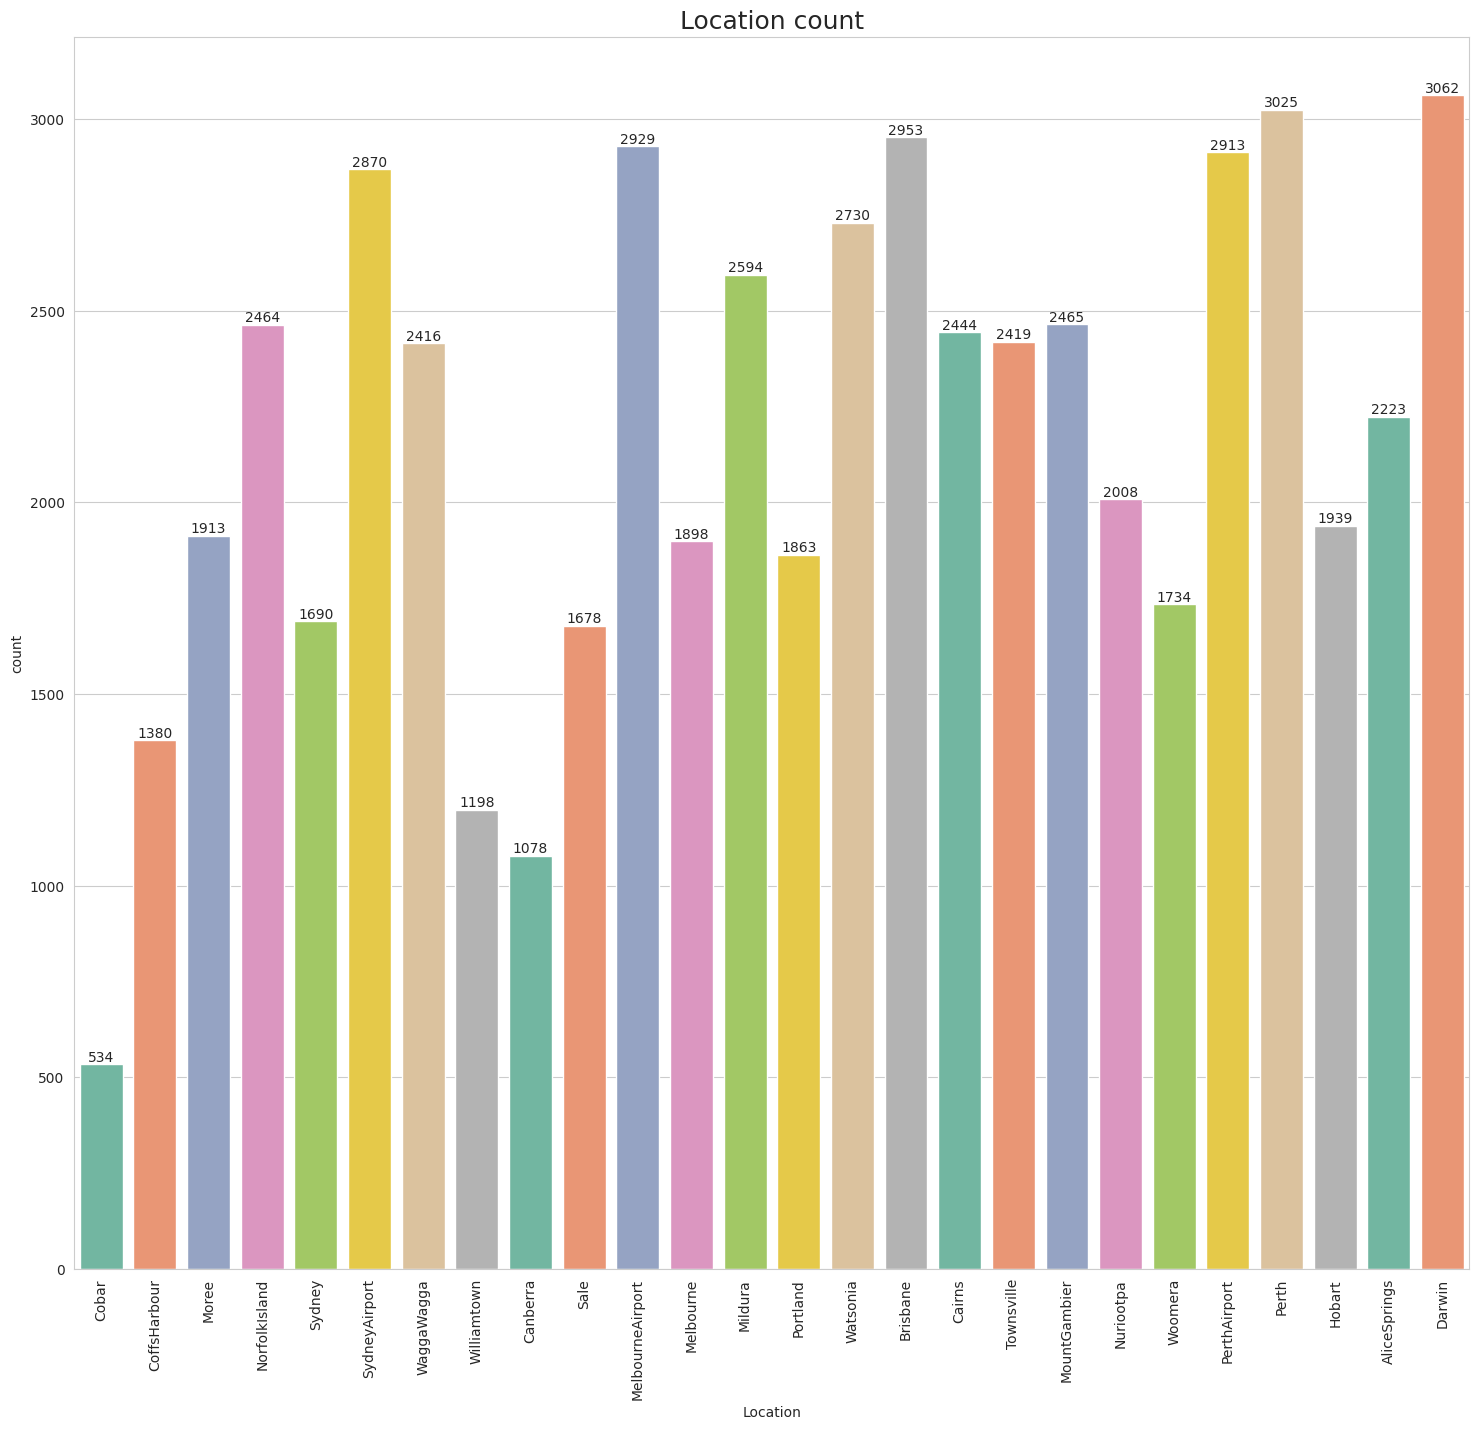

In [23]:
plt.figure(figsize=(18,16))
ax = sns.countplot(x ='Location',data=df3, palette='Set2')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.title('Location count', fontsize=18)

plt.show()

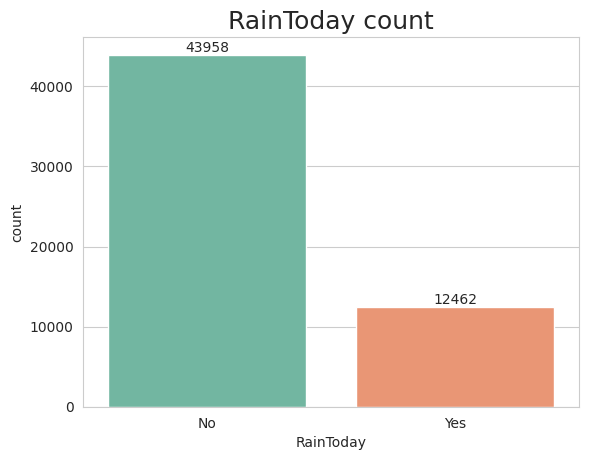

In [24]:
ax = sns.countplot(x ='RainToday',data=df3,palette='Set2')
ax.bar_label(ax.containers[0]) 
plt.title('RainToday count', fontsize=18)
plt.show()

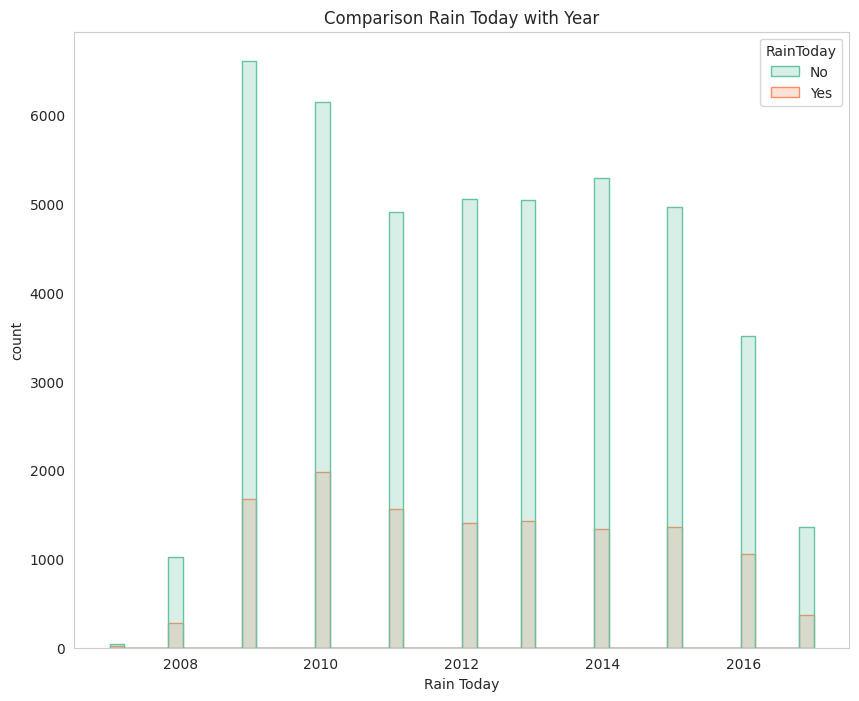

In [25]:
plt.figure (figsize=(10,8))
sns.histplot(x= "Year", hue = "RainToday",data =df3, palette ="Set2",element ="step",common_norm=False)
plt.grid()
plt.title("Comparison Rain Today with Year")
plt.xlabel("Rain Today" )
plt.ylabel("count")
plt.show()

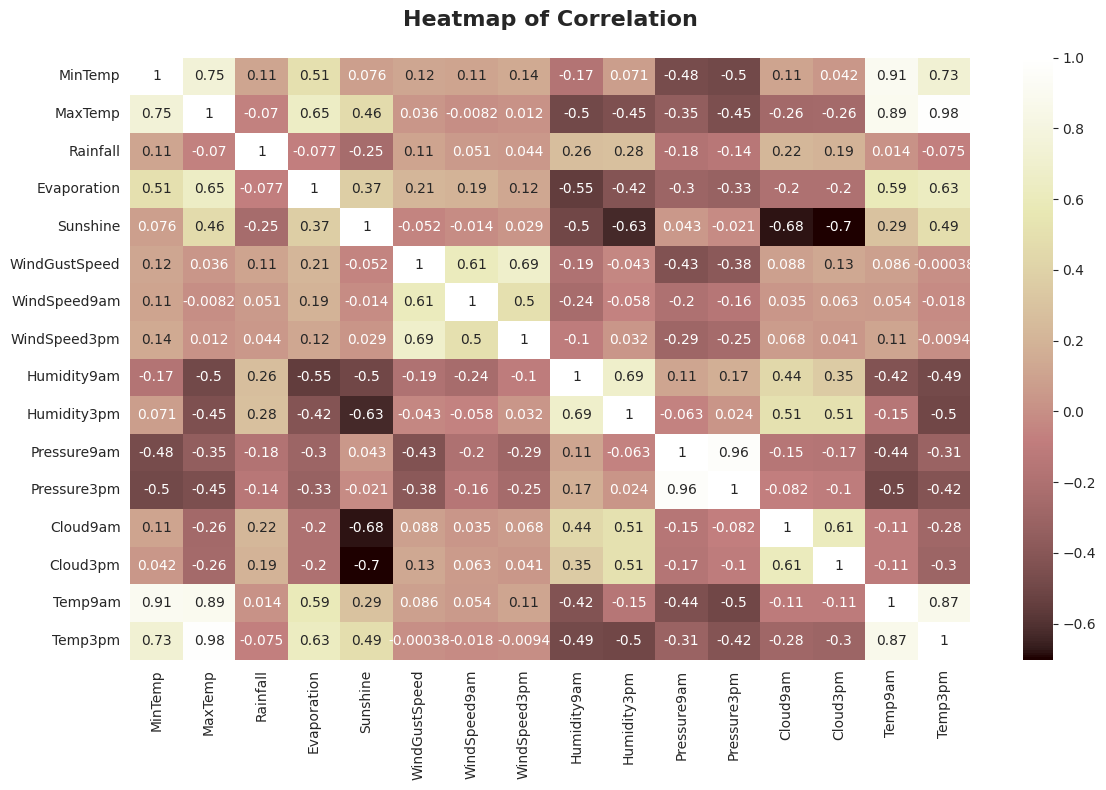

In [26]:
# heat map
plt.figure(figsize=(12, 8))
sns.heatmap( df3.select_dtypes(['float64']).corr(), annot=True, cmap='pink')
plt.title('Heatmap of Correlation\n', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [29]:
df3=pd.get_dummies(df3,drop_first=True)

In [30]:
df3.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
6049,2009-01-01 00:00:00+00:00,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,...,False,False,False,False,True,False,False,False,False,False
6050,2009-01-02 00:00:00+00:00,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,...,False,False,True,False,False,False,False,False,False,False
6052,2009-01-04 00:00:00+00:00,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,...,False,False,False,False,False,False,False,False,False,False
6053,2009-01-05 00:00:00+00:00,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,...,False,False,False,False,False,False,False,True,False,False
6054,2009-01-06 00:00:00+00:00,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,...,False,False,False,False,False,False,True,False,False,False


In [37]:
x=df3.drop(['RainTomorrow_Yes','Date'],axis=1)
y=df3['RainTomorrow_Yes']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [45]:
def getModel(model , x_train , y_train , x_test , y_test):
    mod = model.fit(x_train , y_train)
    predict = model.predict(x_test)
    print("------------Accury Score------------")
    print(accuracy_score(predict,y_test))
    print("------------Classification Report------------")
    print(classification_report(predict,y_test))
    sns.heatmap(confusion_matrix(predict,y_test),annot=True,fmt='.2f',cmap="crest")


------------Accury Score------------
0.8629918468628146
------------Classification Report------------
              precision    recall  f1-score   support

       False       0.96      0.88      0.92      9645
        True       0.52      0.79      0.63      1639

    accuracy                           0.86     11284
   macro avg       0.74      0.83      0.77     11284
weighted avg       0.90      0.86      0.87     11284



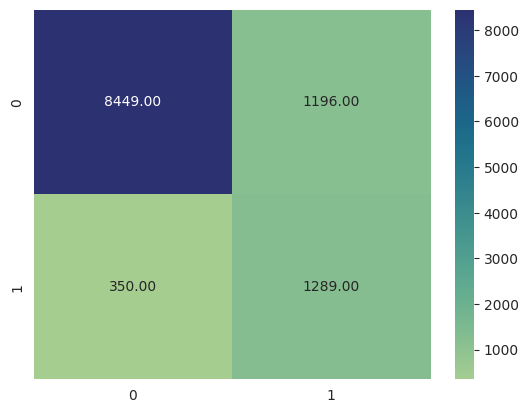

In [46]:
getModel(RandomForestClassifier(), x_train , y_train , x_test , y_test)

------------Accury Score------------
0.794310528181496
------------Classification Report------------
              precision    recall  f1-score   support

       False       0.87      0.87      0.87      8776
        True       0.54      0.53      0.54      2508

    accuracy                           0.79     11284
   macro avg       0.70      0.70      0.70     11284
weighted avg       0.79      0.79      0.79     11284



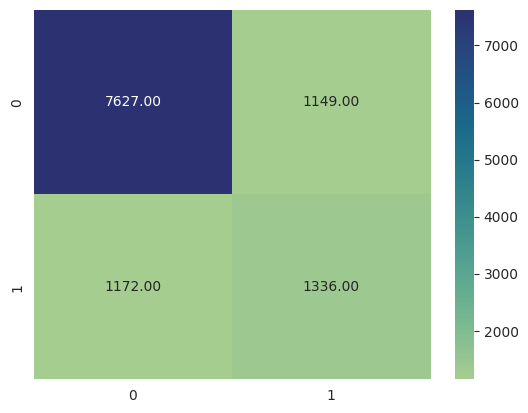

In [49]:
getModel(DecisionTreeClassifier(), x_train , y_train , x_test , y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------------Accury Score------------
0.8553704360155973
------------Classification Report------------
              precision    recall  f1-score   support

       False       0.95      0.88      0.91      9497
        True       0.53      0.74      0.62      1787

    accuracy                           0.86     11284
   macro avg       0.74      0.81      0.76     11284
weighted avg       0.88      0.86      0.86     11284



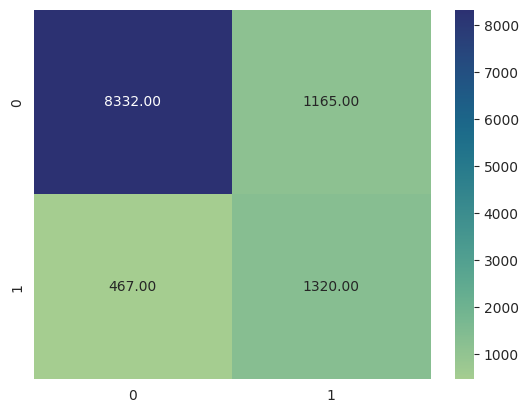

In [50]:
getModel(LogisticRegression(), x_train , y_train , x_test , y_test)

------------Accury Score------------
0.8394186458702588
------------Classification Report------------
              precision    recall  f1-score   support

       False       0.93      0.87      0.90      9443
        True       0.51      0.68      0.58      1841

    accuracy                           0.84     11284
   macro avg       0.72      0.78      0.74     11284
weighted avg       0.86      0.84      0.85     11284



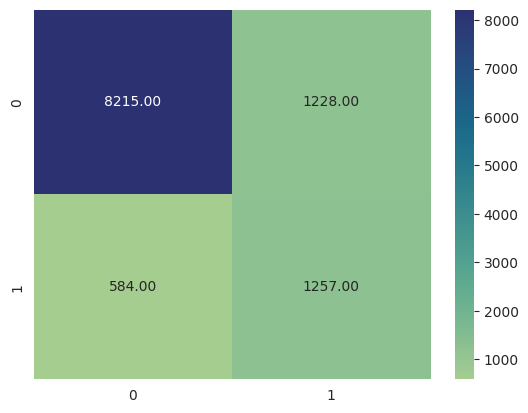

In [51]:
getModel(KNeighborsClassifier(), x_train , y_train , x_test , y_test)

------------Accury Score------------
0.8644984048209855
------------Classification Report------------
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      9344
           1       0.58      0.75      0.65      1940

    accuracy                           0.86     11284
   macro avg       0.76      0.82      0.79     11284
weighted avg       0.88      0.86      0.87     11284



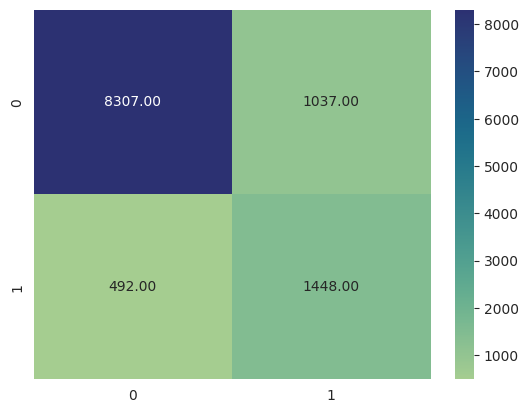

In [52]:
getModel(XGBClassifier(), x_train , y_train , x_test , y_test)